In [1]:
%cd ..

/home/jt4812/PycharmProjects/Optimization


In [2]:
import matplotlib

In [3]:
# %matplotlib widget
%matplotlib inline

In [4]:
import os, yaml
cfg_path = os.path.join("configs/config.yml")
with open(cfg_path, "r") as cfg_file:
    cfg = yaml.load(cfg_file, Loader=yaml.FullLoader)

In [5]:
import time
import numpy as np

from src.func_opt_factory import get_function, get_optimizer
from src.utils import process_config, dump_result, read_config, visualize

SEED = 1476585

xk_ls_ = {}
fx_ls_ = {}

if __name__ == '__main__':
    cfg = read_config()
    for func_, opt_config in cfg.items():
        
        xk_ls_ = {}
        fx_ls_ = {}
#         fx_ls = {}
        
        for opt_, config in opt_config.items():
            np.random.seed(SEED)

            opt_func = get_function(func_)()

            print(func_, opt_, config)
            config = process_config(opt_func, config)

            optimizer = get_optimizer(opt_)
            *result, fx__, xk__ = optimizer(**config)
            dump_result(func_, opt_, result)

#             fx_ls[opt_] = fx_ls_
            
            xk_ls_[opt_] = xk__
            fx_ls_[opt_] = fx__
            
#         visualize(fx_ls, func_)


quadratic gradient_descent {'x0': None, 'grad': False, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 4}
No fx movement
quadratic newton_method {'x0': None, 'grad': True, 'hessian': True, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 4}
No x movement
quadratic quasi_newton_method {'x0': None, 'grad': True, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 4}
No fx movement
quadratic adam_optimizer {'x0': None, 'grad': False, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 4}
No fx movement
log gradient_descent {'x0': None, 'grad': True, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 1}
No fx movement


/home/jt4812/PycharmProjects/Optimization/src/functions/log.py:34: RuntimeWarning: invalid value encountered in log
  fx = self.c.T @ x - (np.log(self.b - self.A @ x)).sum()


log newton_method {'x0': None, 'grad': True, 'hessian': True, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 1}
No fx movement
log quasi_newton_method {'x0': None, 'grad': True, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 1}
No fx movement
log adam_optimizer {'x0': None, 'grad': True, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-05, 'alpha': 0.9}
No fx movement
bi_quadratic gradient_descent {'x0': [2, 2], 'grad': True, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-07, 'alpha': 1}
No fx movement
bi_quadratic newton_method {'x0': [2, 2], 'grad': True, 'hessian': True, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-07, 'alpha': 1}
No fx movement
bi_quadratic quasi_newton_method {'x0': [2, 2], 'grad': True, 'hessian': False, 'max_iters': 5000, 'delta1': 1e-07, 'delta2': 1e-07, 'alpha': 1}
No fx movement
bi_quadratic adam_optimizer {'x0': [2, 2], 'grad': True, 'hessian': False, 'max_iters': 5000,

In [6]:
for opt_, xk_ls in xk_ls_.items():
    xk_ls = np.stack(xk_ls).squeeze()
    xk_ls_[opt_] = xk_ls 

In [7]:
xk_ls_["gradient_descent"].shape, xk_ls_["gradient_descent"][-1]

((3375, 2), array([1.00660164, 1.0133078 ]))

In [8]:
xk_ls_["adam_optimizer"].shape, xk_ls_["adam_optimizer"][-1]

((1400, 2), array([1.00278734, 1.00559025]))

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from src.functions import BiQuadraticFunction

In [10]:
def f(x):
    fx = 100 * (x[1]  - x[0] ** 2) ** 2 + (1 - x[0] ** 2)
    return fx

def f_(x, y):
    fx = 100 * (y  - x ** 2) ** 2 + (1 - x ** 2)
    return fx

In [11]:
xlim = ylim = 3
xs = np.linspace(-1, 3, 30)
ys = np.linspace(0, 4, 30)

xs, ys = np.meshgrid(xs, ys)

v_func = np.vectorize(f_)

In [12]:
len(xk_ls_)

4

In [13]:
fx_ls_["adam_optimizer"][-1]

7.775350154266479e-06

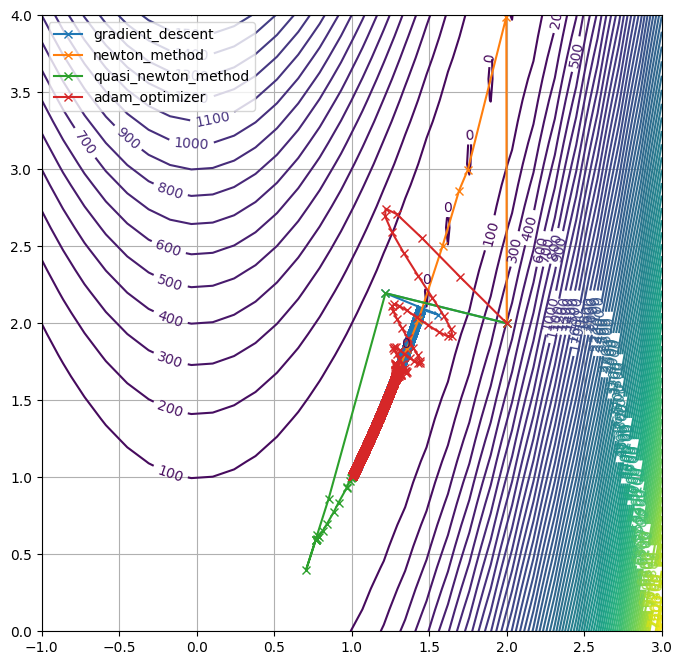

In [14]:
plt.figure(figsize=(8, 8))
cs = plt.contour(
    xs, ys, v_func(xs, ys), levels=100)

plt.clabel(cs)
# time.sleep(0.2)
plt.grid()
for opt_ in xk_ls_:
    plt.plot(xk_ls_[opt_][:, 0], xk_ls_[opt_][:, 1], marker="x")
plt.legend(xk_ls_.keys())
plt.show()